In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

import warnings
warnings.filterwarnings('ignore')

In [2]:
cocacola=pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


### EDA:

In [3]:
cocacola.shape

(42, 2)

In [4]:
cocacola.dtypes

Quarter     object
Sales      float64
dtype: object

In [5]:
cocacola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

##### No null values

In [6]:
cocacola.info

<bound method DataFrame.info of    Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q4_

In [7]:
cocacola2=pd.read_excel('CocaCola_Sales_Rawdata.xlsx',index_col=0,parse_dates=True)
cocacola2

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996
Q2_87,2104.411995
Q3_87,2014.362999
Q4_87,1991.746998
Q1_88,1869.049999


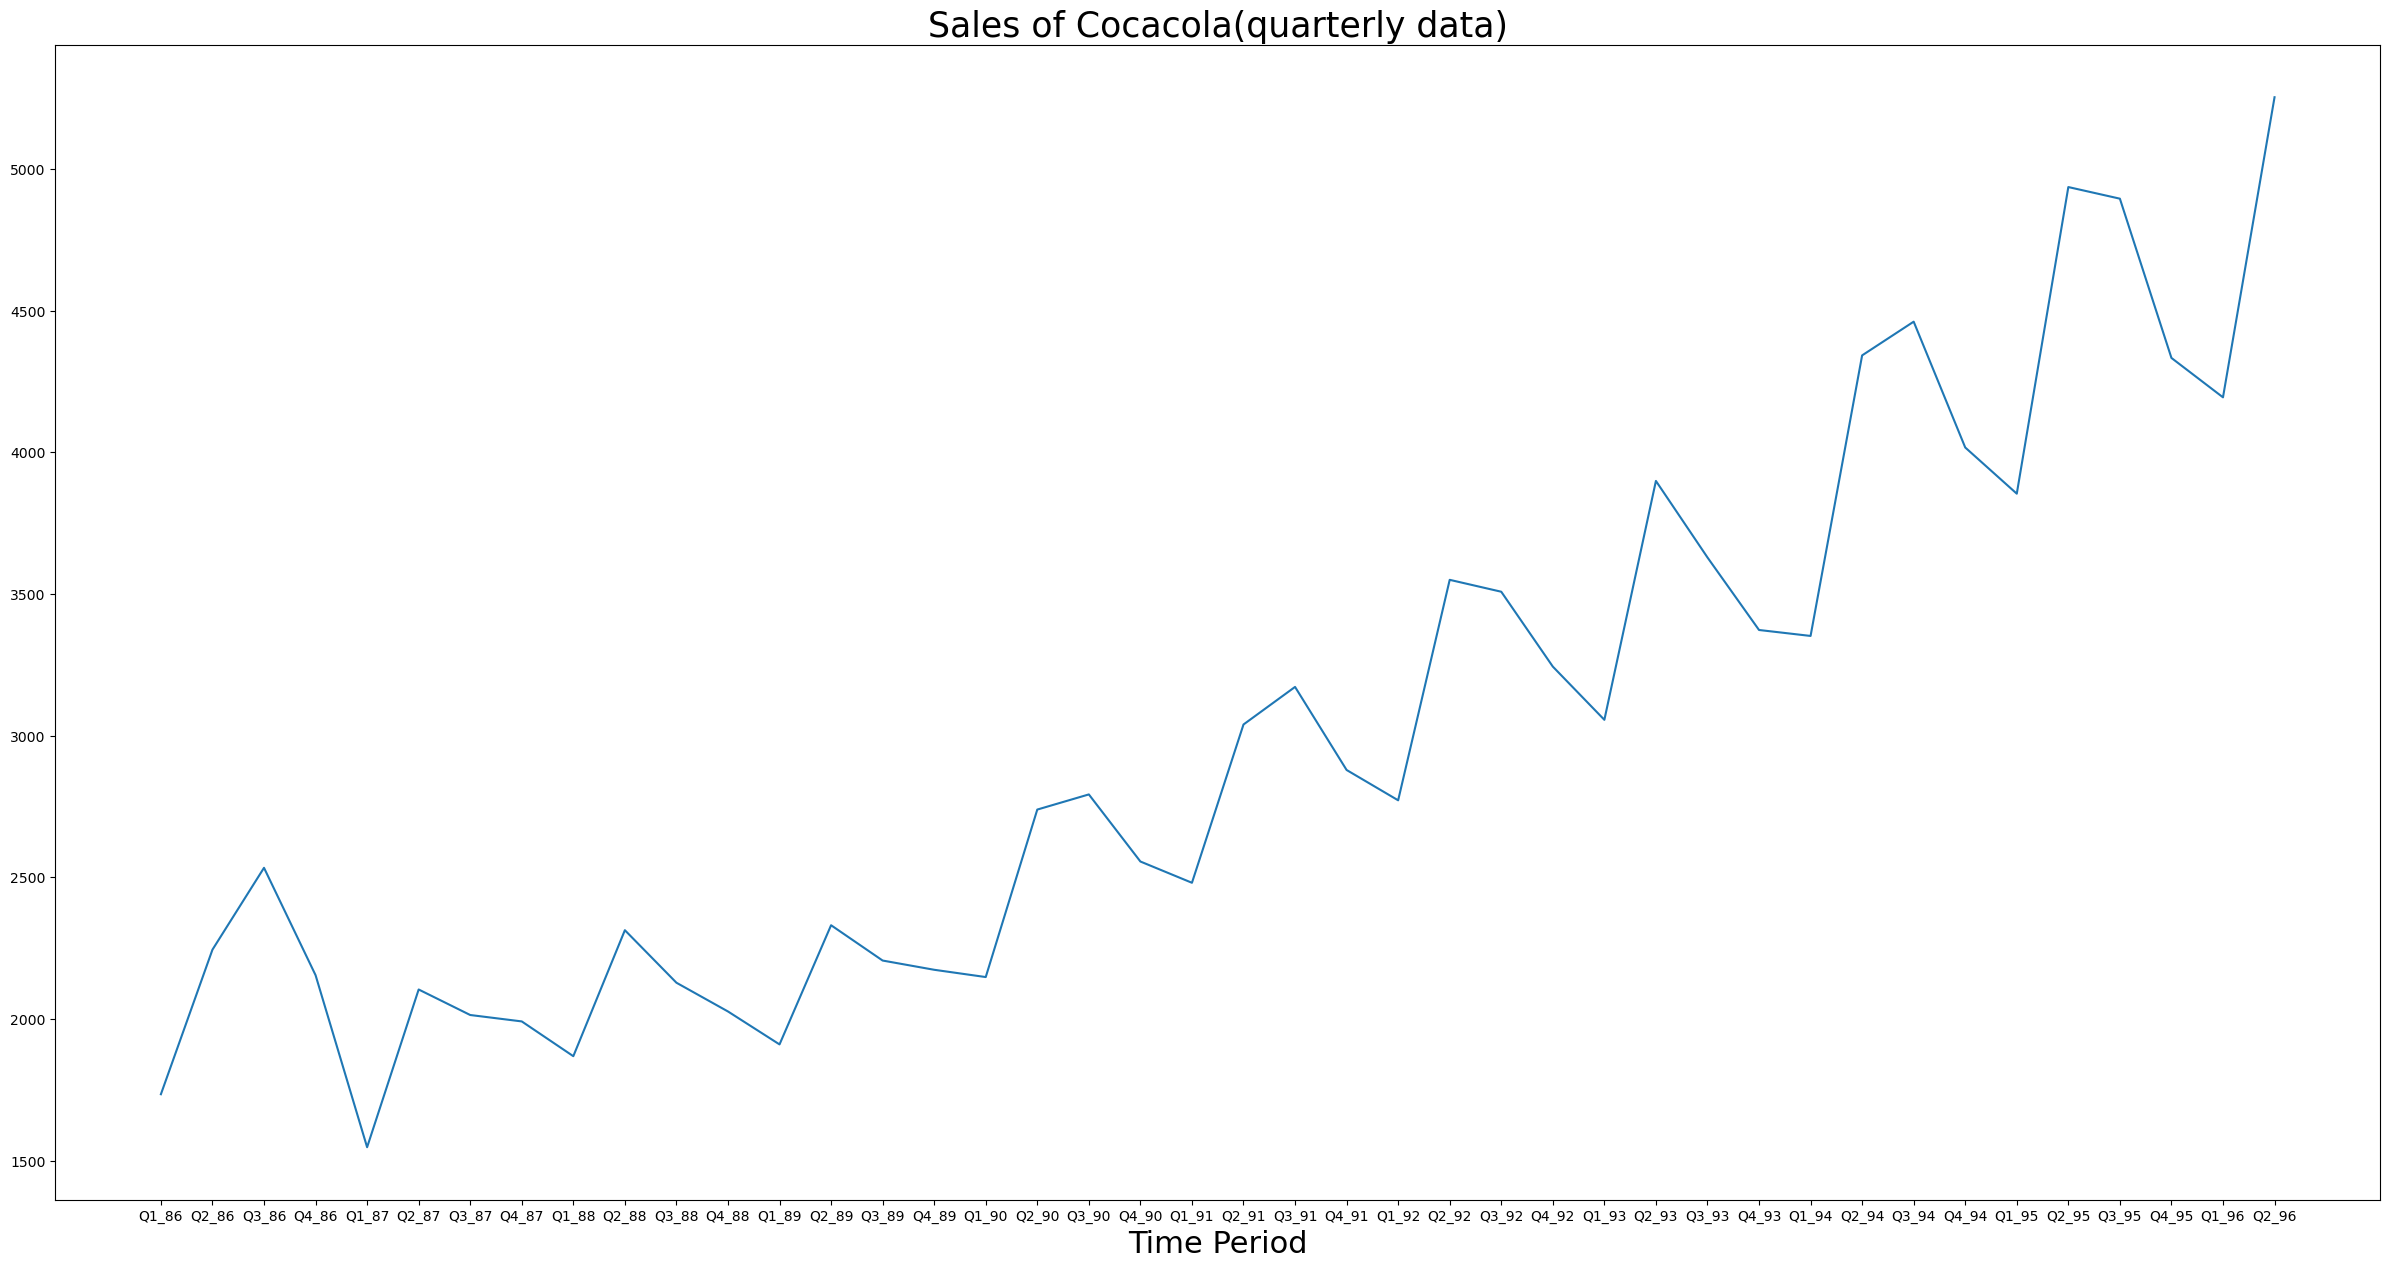

In [8]:
plt.figure(figsize=(30,15))
plt.plot(cocacola2['Sales'])
plt.title('Sales of Cocacola(quarterly data)',size=25)
plt.xlabel('Time Period',size=22)
plt.show()

### Splitting data

In [9]:
train=cocacola.head(30)
test=cocacola.tail(12)

In [10]:
train

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [11]:
test

,Quarter,Sales
30,Q3_93,3629.0
31,Q4_93,3373.0
32,Q1_94,3352.0
33,Q2_94,4342.0
34,Q3_94,4461.0
35,Q4_94,4017.0
36,Q1_95,3854.0
37,Q2_95,4936.0
38,Q3_95,4895.0
39,Q4_95,4333.0


### Moving Average

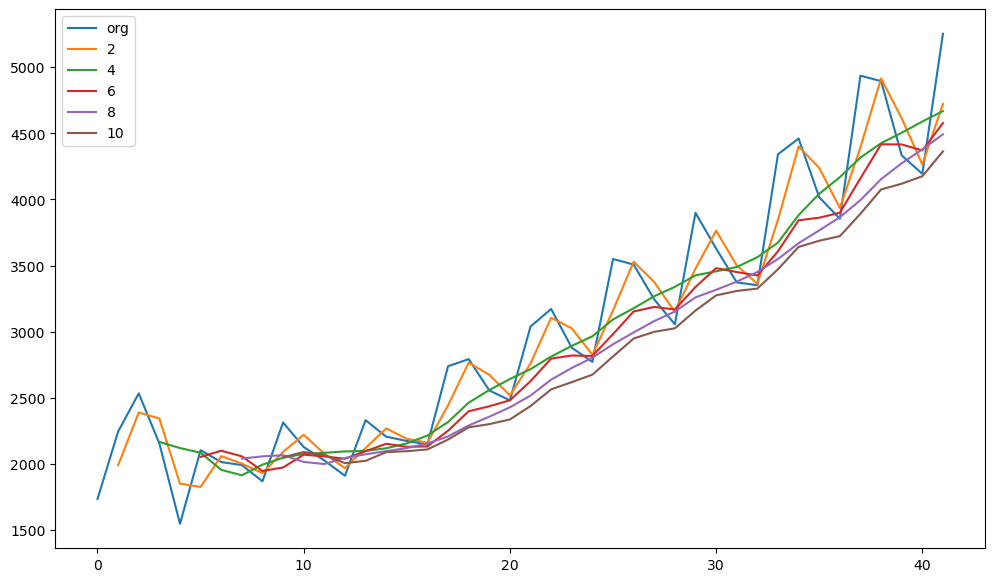

In [12]:
plt.figure(figsize=(12,7))
cocacola.Sales.plot(label='org')
for i in range(2,12,2):
    cocacola['Sales'].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')
plt.show()

### Time series decomposition plot

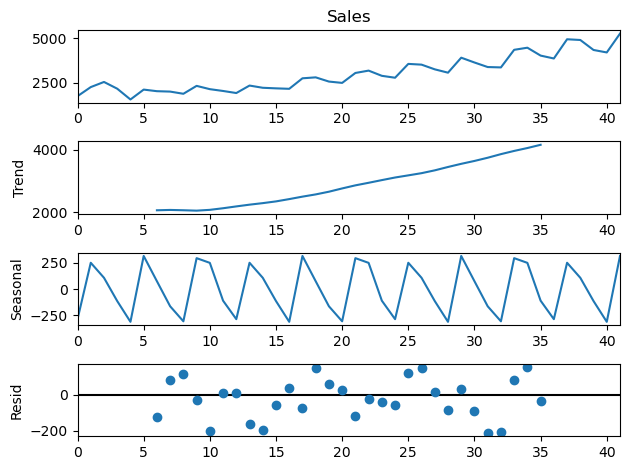

In [13]:
decompose=seasonal_decompose(cocacola.Sales,period=12)
decompose.plot()
plt.show()

### ACF plots and PACF plots

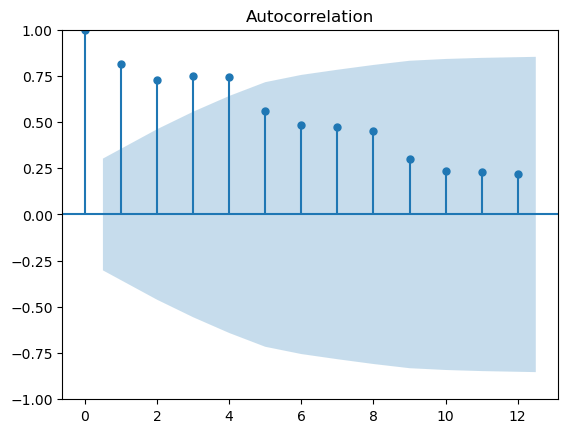

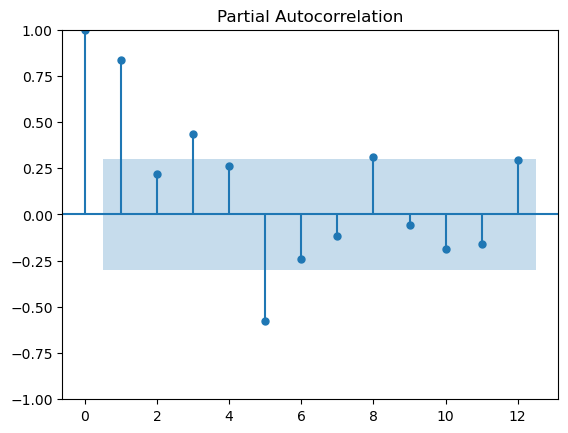

In [14]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola.Sales,lags=12)
tsa_plots.plot_pacf(cocacola.Sales,lags=12)
plt.show()

### Evaluation Metrics RMSE

In [15]:
def RMSE(predictions,targets):
    squared_errors=(predictions-targets)**2
    mean_squared=np.mean(squared_errors)
    rmse=np.sqrt(mean_squared)
    return rmse

### Simple Exponential Method

In [16]:
se_model=SimpleExpSmoothing(train['Sales']).fit(smoothing_level=0.6)
pred_ses=se_model.predict(start=test.index[0],end=test.index[-1])
RMSE(pred_ses,test.Sales)

851.0029679860102

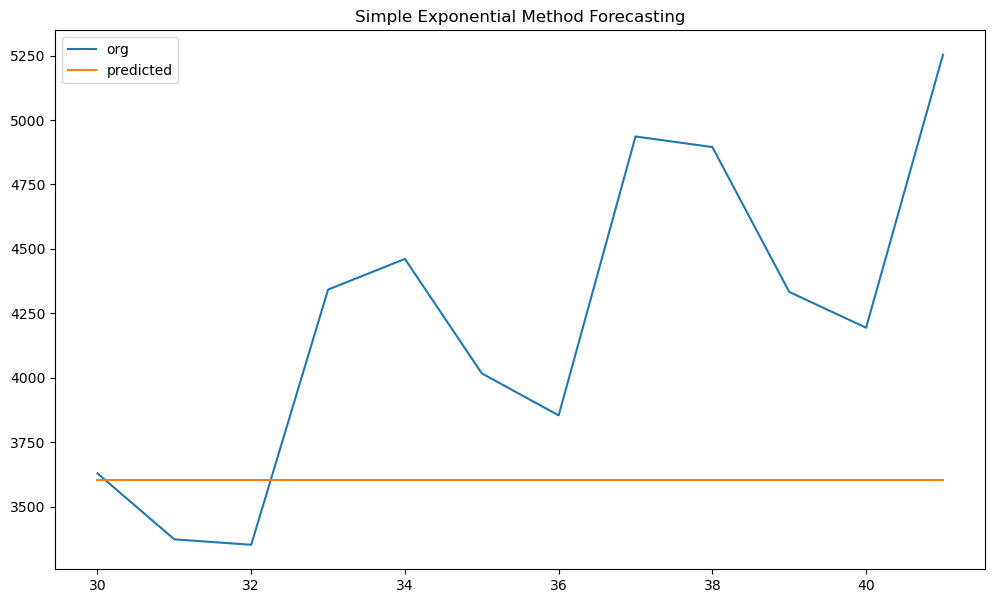

In [17]:
plt.figure(figsize=(12,7))
test.Sales.plot(label='org')
pred_ses.plot(label='predicted')
plt.title('Simple Exponential Method Forecasting')
plt.legend(loc='upper left')
plt.show()

### Holt Method

In [18]:
hw_model=Holt(train['Sales']).fit(smoothing_level=0.5,smoothing_trend=0.6)
pred_hw=hw_model.predict(start=test.index[0],end=test.index[-1])
RMSE(pred_hw,test.Sales)

464.54451230966396

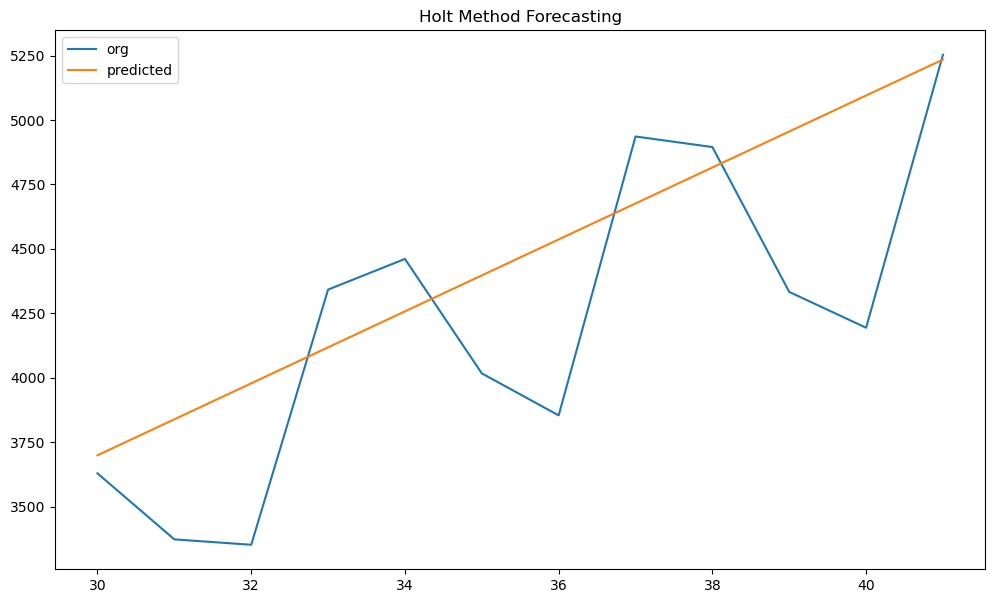

In [19]:
plt.figure(figsize=(12,7))
test.Sales.plot(label='org')
pred_hw.plot(label='predicted')
plt.title('Holt Method Forecasting')
plt.legend(loc='upper left')
plt.show()

### Holts winter exponential smoothing with additive seasonality and additive trend

In [20]:
hwe_model_add=ExponentialSmoothing(train['Sales'],seasonal='add',trend='add',seasonal_periods=4).fit(smoothing_level=0.6)
pred_hwe_add=hwe_model_add.predict(start=test.index[0],end=test.index[-1])
RMSE(pred_hwe_add,test.Sales)

251.39268087652002

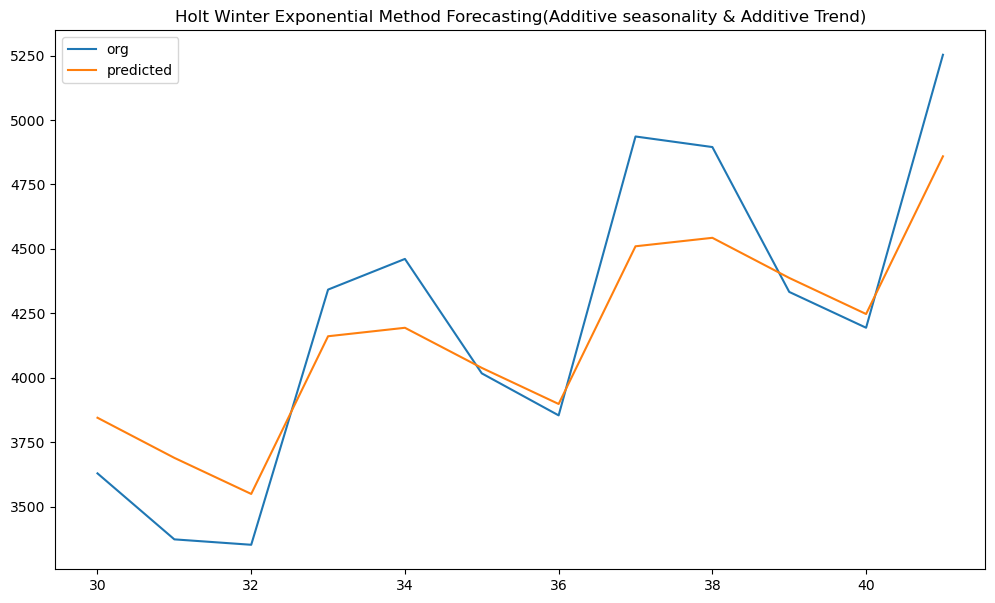

In [21]:
plt.figure(figsize=(12,7))
test.Sales.plot(label='org')
pred_hwe_add.plot(label='predicted')
plt.title('Holt Winter Exponential Method Forecasting(Additive seasonality & Additive Trend)')
plt.legend(loc='upper left')
plt.show()

### Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [22]:
hwe_model_mul_add=ExponentialSmoothing(train['Sales'],seasonal='mul',trend='add',seasonal_periods=4).fit(smoothing_level=0.6)
pred_hwe_mul_add=hwe_model_mul_add.predict(start=test.index[0],end=test.index[-1])
RMSE(pred_hwe_mul_add,test.Sales)

196.54610672908663

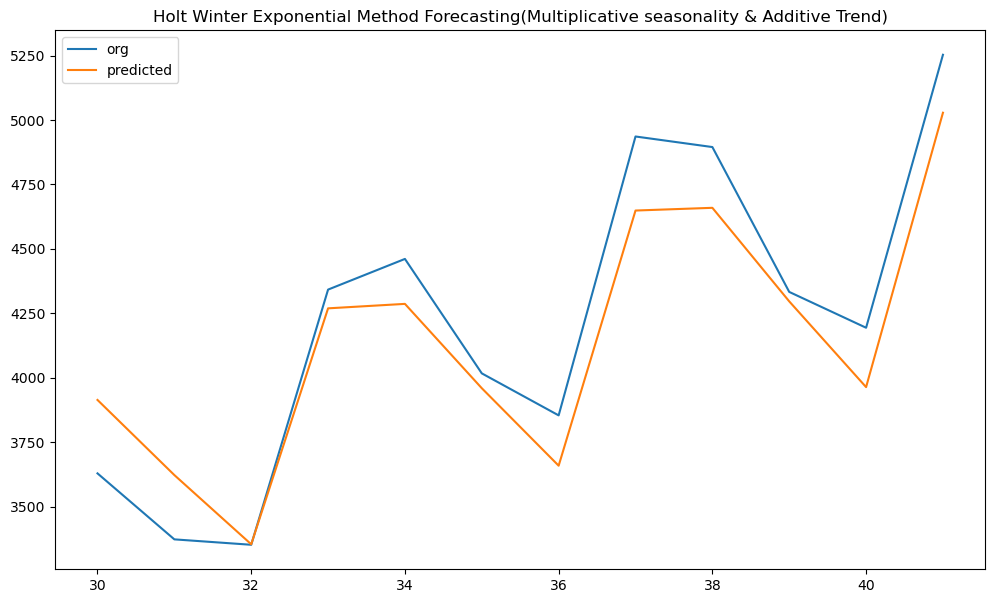

In [23]:
plt.figure(figsize=(12,7))
test.Sales.plot(label='org')
pred_hwe_mul_add.plot(label='predicted')
plt.title('Holt Winter Exponential Method Forecasting(Multiplicative seasonality & Additive Trend)')
plt.legend(loc='upper left')
plt.show()

### Holts winter exponential smoothing with multiplicative seasonality and multiplicative trend

In [24]:
hwe_model_mul2=ExponentialSmoothing(train['Sales'],seasonal='mul',trend='mul',seasonal_periods=4).fit(smoothing_level=0.6)
pred_hwe_mul2=hwe_model_mul2.predict(start=test.index[0],end=test.index[-1])
RMSE(pred_hwe_mul2,test.Sales)

152.18061280957394

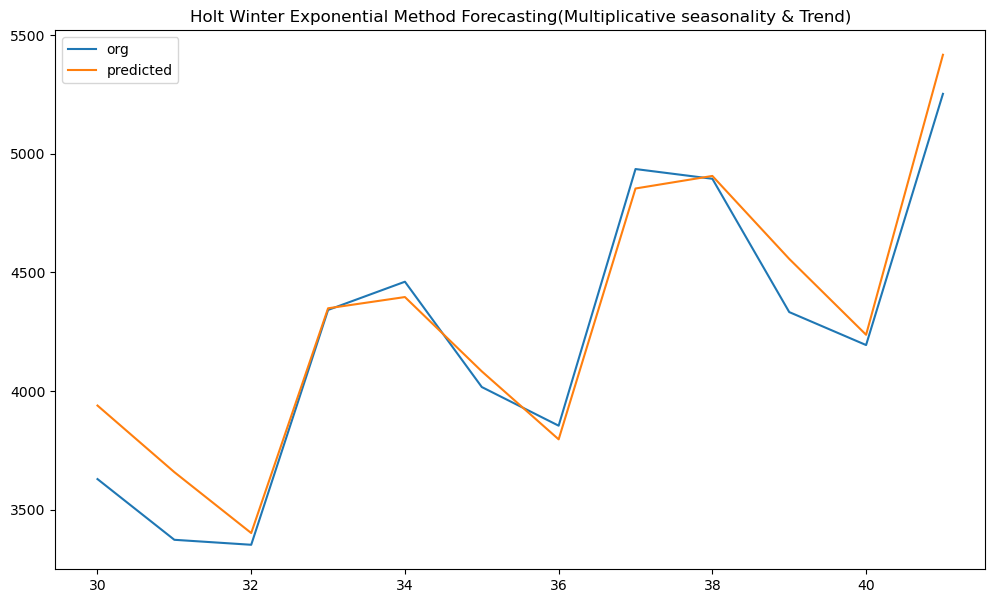

In [25]:
plt.figure(figsize=(12,7))
test.Sales.plot(label='org')
pred_hwe_mul2.plot(label='predicted')
plt.title('Holt Winter Exponential Method Forecasting(Multiplicative seasonality & Trend)')
plt.legend(loc='upper left')
plt.show()

### Model based forecasting methods

In [26]:
cocacola_df=cocacola.copy()
cocacola_df

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [27]:
cocacola_df['t']=range(1,len(cocacola)+1)

In [28]:
cocacola_df.dtypes

Quarter     object
Sales      float64
t            int64
dtype: object

In [29]:
#adding t square feature
cocacola_df['t_square']=cocacola_df['t'].apply(lambda x: x**2)
cocacola_df

,Quarter,Sales,t,t_square
0,Q1_86,1734.827000,1,1
1,Q2_86,2244.960999,2,4
2,Q3_86,2533.804993,3,9
3,Q4_86,2154.962997,4,16
4,Q1_87,1547.818996,5,25
5,Q2_87,2104.411995,6,36
6,Q3_87,2014.362999,7,49
7,Q4_87,1991.746998,8,64
8,Q1_88,1869.049999,9,81
9,Q2_88,2313.631996,10,100


In [30]:
#adding log values column
from numpy import log
cocacola_df['log_Sales']=cocacola_df['Sales'].apply(lambda x:log(x))
cocacola_df

,Quarter,Sales,t,t_square,log_Sales
0,Q1_86,1734.827000,1,1,7.458663
1,Q2_86,2244.960999,2,4,7.716443
2,Q3_86,2533.804993,3,9,7.837477
3,Q4_86,2154.962997,4,16,7.675529
4,Q1_87,1547.818996,5,25,7.344602
5,Q2_87,2104.411995,6,36,7.651791
6,Q3_87,2014.362999,7,49,7.608058
7,Q4_87,1991.746998,8,64,7.596767
8,Q1_88,1869.049999,9,81,7.533186
9,Q2_88,2313.631996,10,100,7.746574


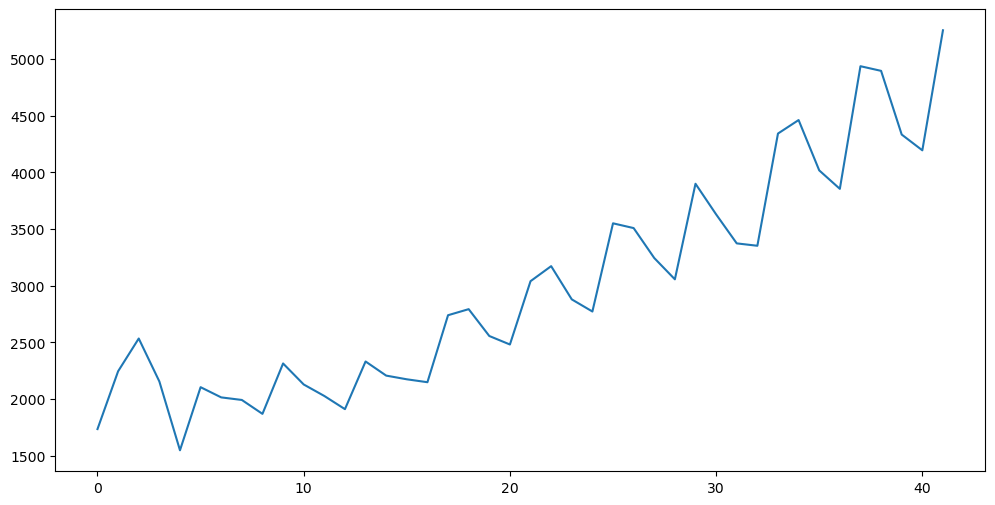

In [31]:
plt.figure(figsize=(12,6))
plt.plot(cocacola_df['Sales'])
plt.show()

### Splitting data

In [32]:
train_df=cocacola_df.head(30)
test_df=cocacola_df.tail(12)

In [33]:
train_df

,Quarter,Sales,t,t_square,log_Sales
0,Q1_86,1734.827000,1,1,7.458663
1,Q2_86,2244.960999,2,4,7.716443
2,Q3_86,2533.804993,3,9,7.837477
3,Q4_86,2154.962997,4,16,7.675529
4,Q1_87,1547.818996,5,25,7.344602
5,Q2_87,2104.411995,6,36,7.651791
6,Q3_87,2014.362999,7,49,7.608058
7,Q4_87,1991.746998,8,64,7.596767
8,Q1_88,1869.049999,9,81,7.533186
9,Q2_88,2313.631996,10,100,7.746574


In [34]:
test_df

,Quarter,Sales,t,t_square,log_Sales
30,Q3_93,3629.0,31,961,8.196712
31,Q4_93,3373.0,32,1024,8.123558
32,Q1_94,3352.0,33,1089,8.117312
33,Q2_94,4342.0,34,1156,8.376090
34,Q3_94,4461.0,35,1225,8.403128
35,Q4_94,4017.0,36,1296,8.298291
36,Q1_95,3854.0,37,1369,8.256867
37,Q2_95,4936.0,38,1444,8.504311
38,Q3_95,4895.0,39,1521,8.495970
39,Q4_95,4333.0,40,1600,8.374015


In [35]:
#Linear Model
import statsmodels.formula.api as smf

linear_model=smf.ols('Sales~t',data=train_df).fit()
pred_linear=pd.Series(linear_model.predict(pd.DataFrame(test_df['t'])))
rmse_linear=RMSE(pred_linear,test_df.Sales)
rmse_linear

714.0144483281305

In [36]:
#Exponential

Exp_model=smf.ols('log_Sales~t',data=train_df).fit()
pred_Exp=pd.Series(Exp_model.predict(pd.DataFrame(test_df['t'])))
rmse_Exp=RMSE(pred_Exp,test_df.Sales)
rmse_Exp

4252.188990972336

In [37]:
#Quadratic

Quad=smf.ols('Sales~t+t_square',data=train_df).fit()
pred_Quad=pd.Series(Quad.predict(test_df[['t','t_square']]))
rmse_quad=RMSE(pred_Quad,test_df.Sales)
rmse_quad

646.2715428312007

In [38]:
data={'MODEL':pd.Series(['rmse_linear','rmse_Exp','rmse_quad']),'RMSE_Values':pd.Series([rmse_linear,rmse_Exp,rmse_quad])}
table_rmse=pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,714.014448
1,rmse_Exp,4252.188991
2,rmse_quad,646.271543


### Final Model by combining train and test data

In [39]:
hwe_model_mul_add=ExponentialSmoothing(cocacola['Sales'],seasonal='mul',trend='add',seasonal_periods=4).fit(smoothing_level=0.6)

In [40]:
#Forecasting for next 12 time periods
hwe_model_mul_add.forecast(12)

42    5213.423850
43    4776.485675
44    4519.378649
45    5697.982399
46    5633.087646
47    5153.392415
48    4869.098391
49    6130.537149
50    6052.751442
51    5530.299154
52    5218.818132
53    6563.091898
dtype: float64

#### From using all datadriven and some model based methods for forecasting,we came to a conclusion that Holt's winter method with multiplicative seasonality and multiplicative trend gives very low RMSE value (152.2) with seasonal periods as 4 .
### So we can prefer with Holt's Winter Method 